In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso
)

# Dataset Generation

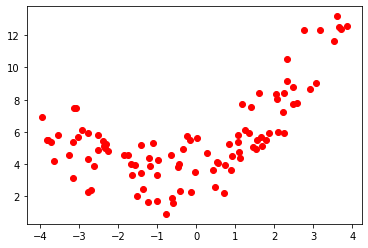

In [39]:
n_samples = 100
noise = 5
X = 8*np.random.rand(n_samples,1) - 4
y = 0.5*X**2 + X + 1 + noise*np.random.rand(n_samples,1)
plt.plot(X, y, 'ro')

# Fit of Lines

In [40]:
def get_y(coef, intercept, X):
    def eq(x):
        degree = len(coef)
        res = 0
        for i in range(1, degree+1):
            res += coef[i-1]*x**i
        return res + intercept
    
    y = []
    for x in X:
        y.append(eq(x))
    return np.array(y)

In [135]:
def get_line_fit(X, y, degree, **kwargs):
    poly_reg = Pipeline([
        ("polynomial", PolynomialFeatures(degree=degree, include_bias=False)),
        ("linear", LinearRegression()),
    ])
    poly_reg.fit(X, y)
    lr = poly_reg.named_steps["linear"]
    
    X_line = np.arange(min(X), max(X), 0.1)
    y_line = get_y(lr.coef_[0], lr.intercept_[0], X_line)
    
    plt.plot(X, y, 'ro', alpha=0.3)
    plt.plot(X_line, y_line)
    plt.axis([-4, 4, 0, 17])
    plt.title(kwargs.get("title"))

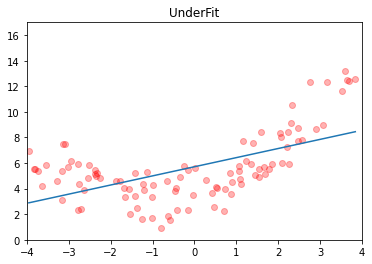

In [136]:
get_line_fit(X, y, 1, title="UnderFit")

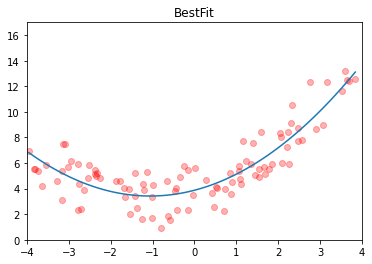

In [138]:
get_line_fit(X, y, 2, title="BestFit")

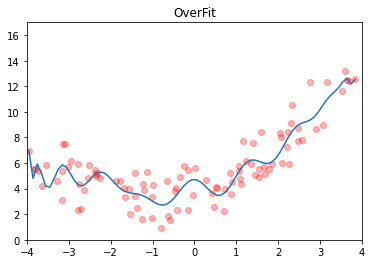

In [139]:
get_line_fit(X, y, 20, title="OverFit")

# Regularized Models

## Ridge Regression

In [70]:
def get_ridge_regularized(X, y, alpha, **kwargs):
    ridge_reg = Pipeline([
        ("polynomial", PolynomialFeatures(degree=20, include_bias=False)),
        ("ridge", Ridge(alpha=alpha, solver="svd", max_iter=1000))
    ])
    ridge_reg.fit(X, y)
    rr = ridge_reg.named_steps["ridge"]
    
    X_line = np.arange(min(X), max(X), 0.1)
    y_line = get_y(rr.coef_[0], rr.intercept_[0], X_line)
    
    plt.plot(X_line, y_line, label=kwargs.get('label'))
    plt.axis([-2, 2, 0, 7])

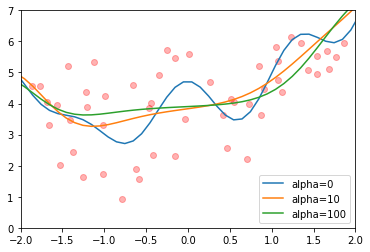

In [71]:
plt.plot(X, y, 'ro', alpha=0.3)
get_ridge_regularized(X, y, 0, label="alpha=0")
get_ridge_regularized(X, y, 10, label="alpha=10")
get_ridge_regularized(X, y, 100, label="alpha=100")
plt.legend()

## Lasso Regression

In [76]:
def get_lasso_regularized(X, y, alpha, **kwargs):
    lasso_reg = Pipeline([
        ("polynomial", PolynomialFeatures(degree=20, include_bias=False)),
        ("lasso", Lasso(alpha=alpha))
    ])
    lasso_reg.fit(X, y)
    lr = lasso_reg.named_steps["lasso"]
    
    X_line = np.arange(min(X), max(X), 0.1)
    y_line = get_y(lr.coef_, lr.intercept_[0], X_line)
    
    plt.plot(X_line, y_line, label=kwargs.get('label'))
    plt.axis([-2, 2, 0, 7])

/home/shaker/.local/lib/python3.10/site-packages/sklearn/pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/shaker/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/shaker/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.563e+01, tolerance: 6.999e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.


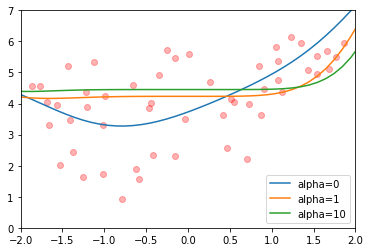

In [78]:
plt.plot(X, y, 'ro', alpha=0.3)
get_lasso_regularized(X, y, 0, label="alpha=0")
get_lasso_regularized(X, y, 1, label="alpha=1")
get_lasso_regularized(X, y, 10, label="alpha=10")
plt.legend()